In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 102k/102k [00:00<00:00, 33.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [2]:
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [3]:
import os
# to identify the file name
# List files in the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4"
print(os.listdir(dataset_path))


['bank_transactions_data_2.csv']


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Define the full path to the data file
file_path = os.path.join(dataset_path, "bank_transactions_data_2.csv")

# Load the data into a pandas DataFrame
import pandas as pd
data = pd.read_csv(file_path)




In [7]:

# Display the first few rows and general info
print(data.head())
print(data.info())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Series([], dtype: int64)


In [11]:
# Date time check
print(data[['TransactionDate', 'PreviousTransactionDate']].head())


      TransactionDate PreviousTransactionDate
0 2023-04-11 16:29:14     2024-11-04 08:08:08
1 2023-06-27 16:44:19     2024-11-04 08:09:35
2 2023-07-10 18:16:08     2024-11-04 08:07:04
3 2023-05-05 16:32:11     2024-11-04 08:09:06
4 2023-10-16 17:51:24     2024-11-04 08:06:39


In [12]:
# Sort by AccountID and TransactionDate
data = data.sort_values(by=['AccountID', 'TransactionDate'])

# Calculate time difference in hours since the last transaction
data['TimeSinceLastTransaction'] = data.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds() / 3600

# Fill NaNs in TimeSinceLastTransaction (first transaction for each account)
data['TimeSinceLastTransaction'].fillna(-1, inplace=True)

# Check the new feature
print(data[['AccountID', 'TransactionDate', 'TimeSinceLastTransaction']].head(10))


     AccountID     TransactionDate  TimeSinceLastTransaction
1312   AC00001 2023-09-15 17:00:20                 -1.000000
2016   AC00001 2023-11-14 16:56:34               1439.937222
2120   AC00002 2023-01-10 16:00:32                 -1.000000
20     AC00002 2023-02-28 16:36:58               1176.607222
1476   AC00002 2023-05-05 16:35:44               1583.979444
61     AC00002 2023-05-16 16:07:30                263.529444
1598   AC00002 2023-07-24 16:14:05               1656.109722
1673   AC00002 2023-09-11 17:52:59               1177.648333
1028   AC00002 2023-12-21 17:00:50               2423.130833
2325   AC00003 2023-01-02 16:45:05                 -1.000000


<ipython-input-12-421a7a6c3c6e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TimeSinceLastTransaction'].fillna(-1, inplace=True)


In [13]:
# Transaction frequency over the past 30 days
data['TransactionFrequency'] = data.groupby('AccountID')['TransactionDate'].transform(
    lambda x: x.diff().dt.days.le(30).sum()
)

# last transaction amount for each account
data['LastTransactionAmount'] = data.groupby('AccountID')['TransactionAmount'].transform('last')

# the total amount transacted by each account
data['CumulativeTransactionAmount'] = data.groupby('AccountID')['TransactionAmount'].transform('sum')

print(data[['AccountID', 'TransactionFrequency', 'LastTransactionAmount', 'CumulativeTransactionAmount']].head(10))


     AccountID  TransactionFrequency  LastTransactionAmount  \
1312   AC00001                     0                 212.97   
2016   AC00001                     0                 212.97   
2120   AC00002                     1                 516.47   
20     AC00002                     1                 516.47   
1476   AC00002                     1                 516.47   
61     AC00002                     1                 516.47   
1598   AC00002                     1                 516.47   
1673   AC00002                     1                 516.47   
1028   AC00002                     1                 516.47   
2325   AC00003                     1                 207.47   

      CumulativeTransactionAmount  
1312                       260.76  
2016                       260.76  
2120                      2056.21  
20                        2056.21  
1476                      2056.21  
61                        2056.21  
1598                      2056.21  
1673              

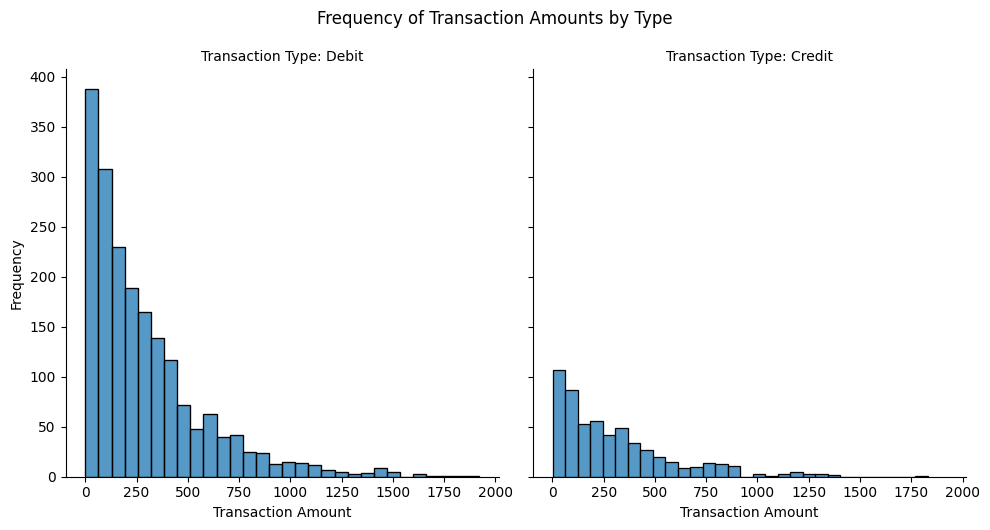

In [21]:
g = sns.FacetGrid(data, col='TransactionType', height=5, aspect=1)
g.map(sns.histplot, 'TransactionAmount', bins=30)
g.set_titles(col_template='Transaction Type: {col_name}')
g.set_axis_labels('Transaction Amount', 'Frequency')
plt.suptitle('Frequency of Transaction Amounts by Type', y=1.05)
plt.show()



<ipython-input-63-32b9dfffa90b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')


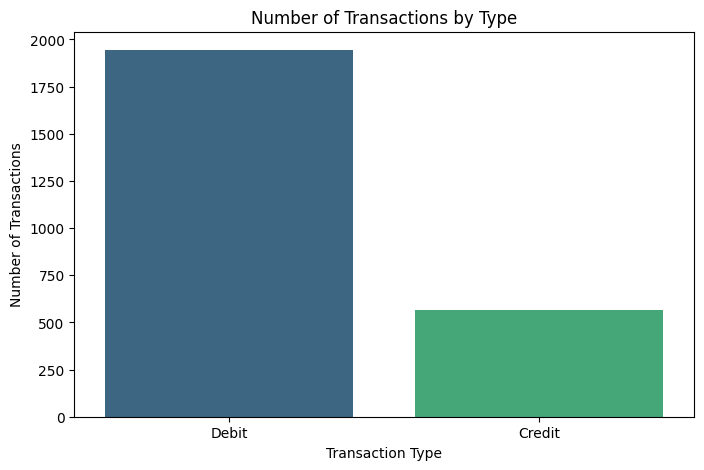

In [63]:
#custom_colors = ['#1f77b4', '#ff7f0e']
transaction_counts = data['TransactionType'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Number of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()


<ipython-input-67-8fec44ed84b2>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['TransactionAmount'], bins=30, kde=True, palette='viridis')


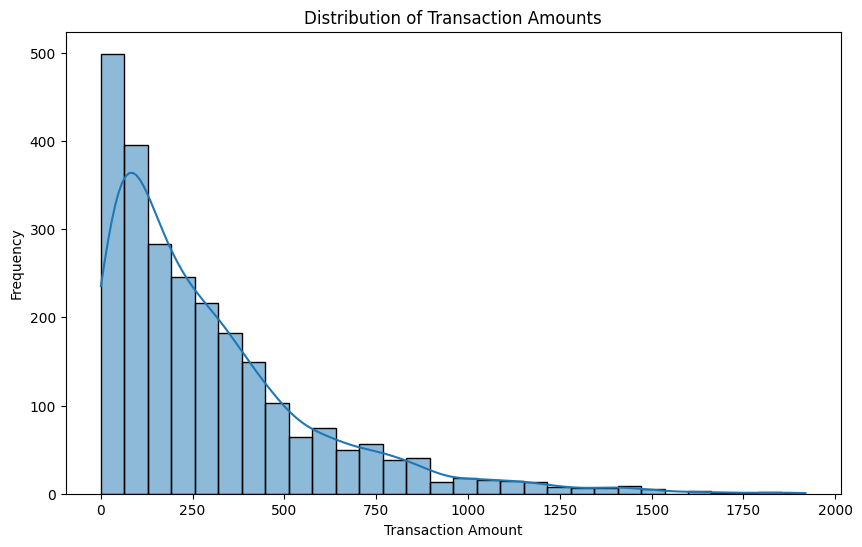

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmount'], bins=30, kde=True,)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


<ipython-input-60-8c39e09f6ff9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TransactionCount', y='Channel', data=channel_usage, palette='viridis')


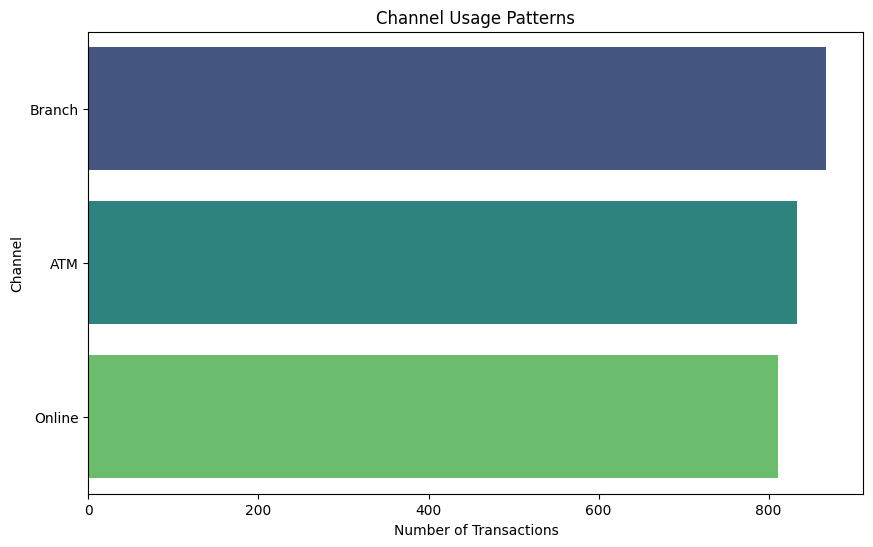

In [60]:
# Count the number of transactions for each channel
channel_usage = data['Channel'].value_counts().reset_index()
channel_usage.columns = ['Channel', 'TransactionCount']

# Plotting the Channel Usage Patterns
plt.figure(figsize=(10, 6))
sns.barplot(x='TransactionCount', y='Channel', data=channel_usage, palette='viridis')
plt.title('Channel Usage Patterns')
plt.xlabel('Number of Transactions')
plt.ylabel('Channel')
plt.show()


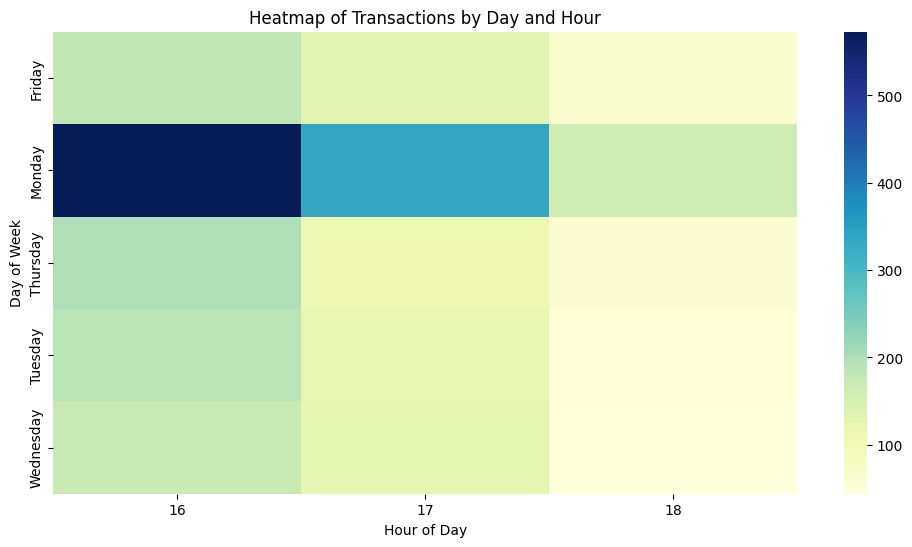

In [36]:
data['Hour'] = data['TransactionDate'].dt.hour
data['Day'] = data['TransactionDate'].dt.day_name()
heatmap_data = data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Transactions by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


<ipython-input-68-09e16c61f32c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction_by_age = data.groupby('AgeGroup')['TransactionAmount'].mean().reset_index()
<ipython-input-68-09e16c61f32c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='TransactionAmount', data=avg_transaction_by_age, palette= custom_palette)
<ipython-input-68-09e16c61f32c>:10: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='AgeGroup', y='TransactionAmount', data=avg_transaction_by_age, palette= custom_palette)


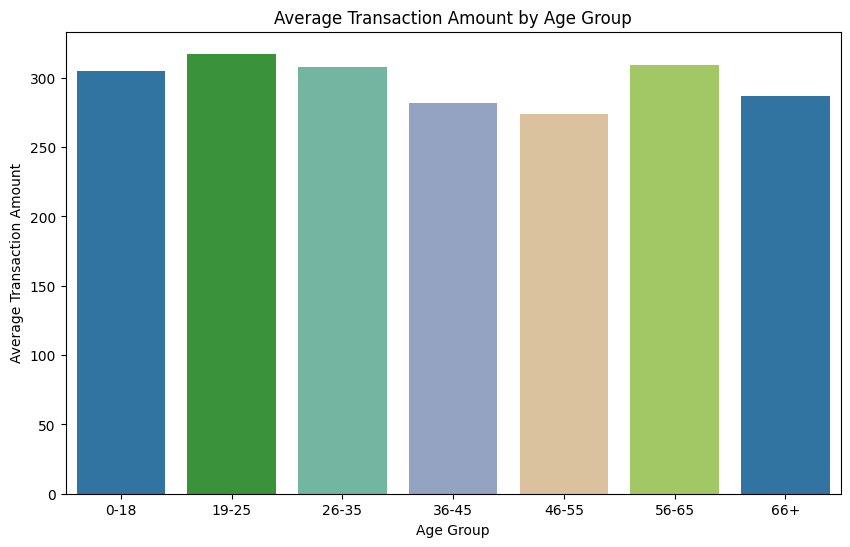

In [68]:
# Age bins
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Age groups
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels)

# Average transaction amount per age group
avg_transaction_by_age = data.groupby('AgeGroup')['TransactionAmount'].mean().reset_index()
custom_palette = sns.color_palette(["#1f77b4", "#2ca02c", "#66c2a5", "#8da0cb", "#e5c494", "#a6d854"])
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='TransactionAmount', data=avg_transaction_by_age, palette= custom_palette)
plt.title('Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Amount')
plt.show()


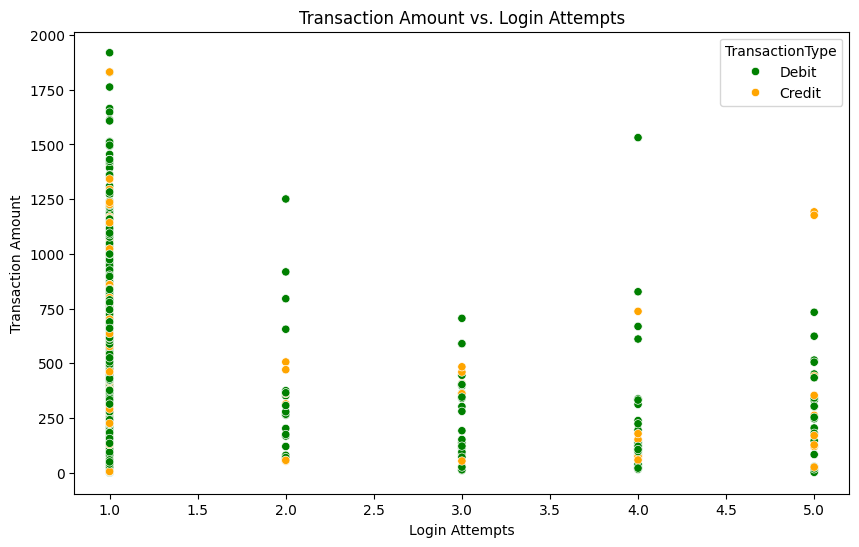

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoginAttempts', y='TransactionAmount', data=data, hue='TransactionType', palette={'Green', 'orange'})
plt.title('Transaction Amount vs. Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Transaction Amount')
plt.show()



Top 10 Locations by Total Transaction Amount:
           Location  TransactionAmount
0            Austin           22740.90
1     Oklahoma City           21716.04
2           Memphis           21170.53
3        Fort Worth           20776.74
4           Detroit           20609.76
5      Jacksonville           20519.47
6            Tucson           20459.76
7  Colorado Springs           20344.63
8          San Jose           20127.87
9       Los Angeles           19675.75


<ipython-input-54-4b908f29e79a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TransactionAmount', y='Location', data=top_locations_amount, palette='Blues_r')


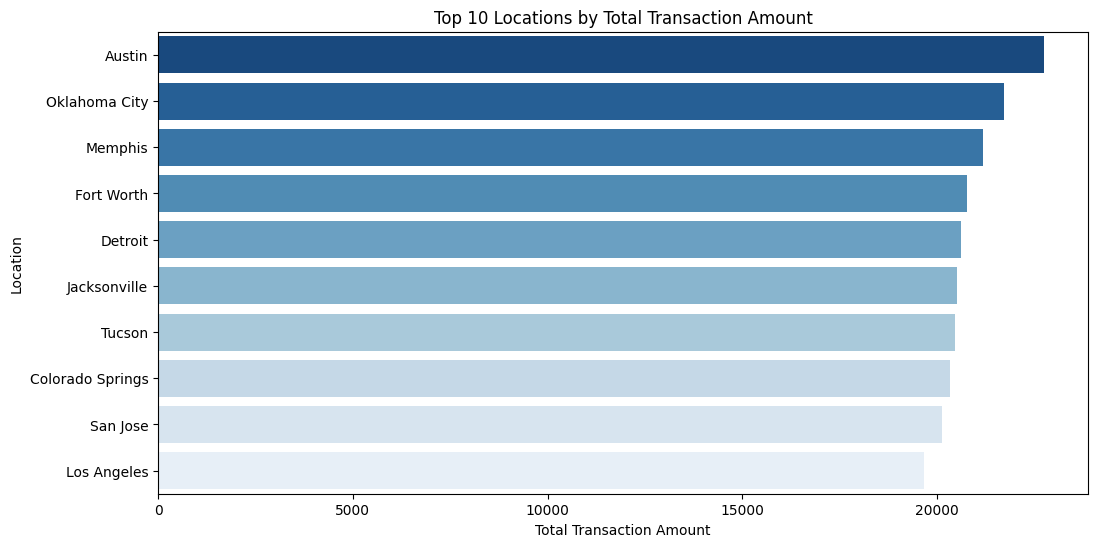

In [54]:
# Group data by Location and sum transaction amounts
top_locations_amount = data.groupby('Location')['TransactionAmount'].sum().sort_values(ascending=False).head(10).reset_index()

print("Top 10 Locations by Total Transaction Amount:")
print(top_locations_amount)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='TransactionAmount', y='Location', data=top_locations_amount, palette='Blues_r')
plt.title('Top 10 Locations by Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Location')
plt.show()


In [55]:
# Define thresholds/constraints for potential fraud detection
high_amount_threshold = data['TransactionAmount'].quantile(0.99)  # 99th percentile
high_login_attempts = 3  # More than 3 login attempts
short_time_threshold = 0.1  # Less than 0.1 hours(or 6 minutes) between transactions

# Created a "PotentialFraud" column based on these rules
data['PotentialFraud'] = (
    (data['TransactionAmount'] > high_amount_threshold) |
    (data['LoginAttempts'] > high_login_attempts) |
    (data['TimeSinceLastTransaction'] < short_time_threshold)
)


<ipython-input-56-f0b73e93ef57>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudCount', y='AccountID', data=fraud_counts, palette='Reds')


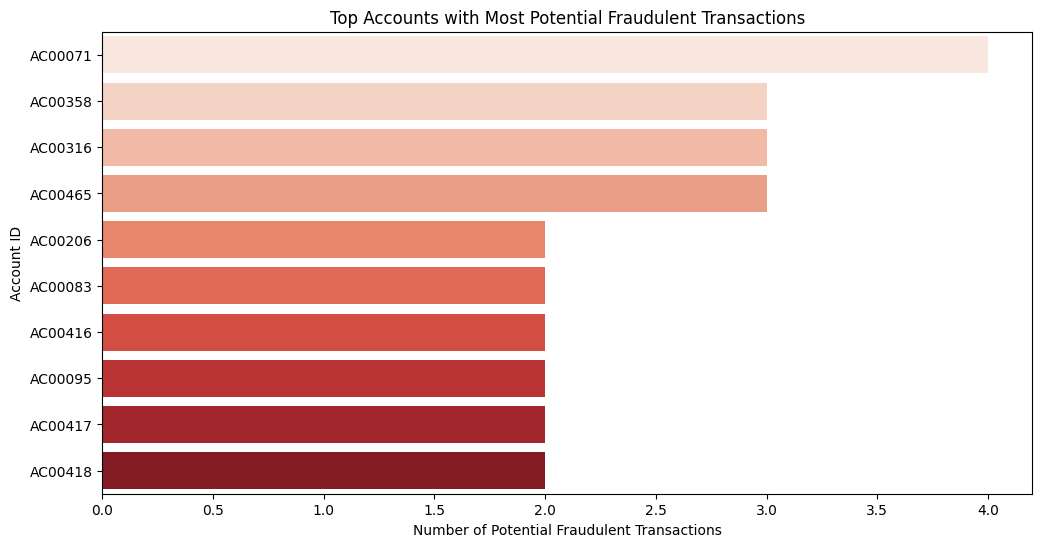

In [56]:
# Count fraudulent transactions per account
fraud_counts = data[data['PotentialFraud']].groupby('AccountID').size().sort_values(ascending=False).head(10).reset_index()
fraud_counts.columns = ['AccountID', 'FraudCount']

plt.figure(figsize=(12, 6))
sns.barplot(x='FraudCount', y='AccountID', data=fraud_counts, palette='Reds')
plt.title('Top Accounts with Most Potential Fraudulent Transactions')
plt.xlabel('Number of Potential Fraudulent Transactions')
plt.ylabel('Account ID')
plt.show()


<ipython-input-58-021ec92e9f76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PotentialFraud', y='TransactionAmount', data=data, palette=['green', 'red'])


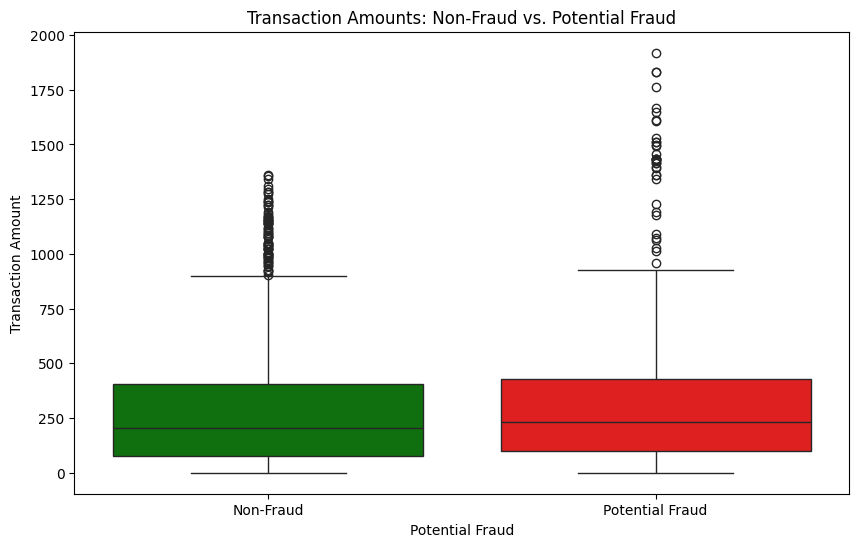

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PotentialFraud', y='TransactionAmount', data=data, palette=['green', 'red'])
plt.title('Transaction Amounts: Non-Fraud vs. Potential Fraud')
plt.xlabel('Potential Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Potential Fraud'])
plt.show()


<ipython-input-59-caa174860a72>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FraudCount', y='Location', data=fraud_location_data, palette='Purples')


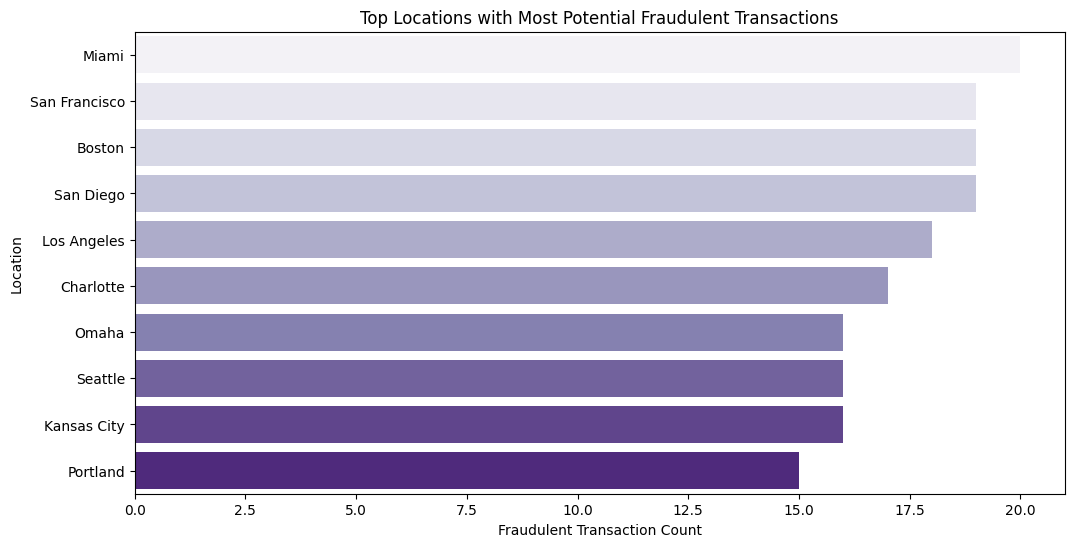

In [59]:
fraud_location_data = data[data['PotentialFraud']].groupby('Location').size().sort_values(ascending=False).head(10).reset_index()
fraud_location_data.columns = ['Location', 'FraudCount']

plt.figure(figsize=(12, 6))
sns.barplot(x='FraudCount', y='Location', data=fraud_location_data, palette='Purples')
plt.title('Top Locations with Most Potential Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction Count')
plt.ylabel('Location')
plt.show()


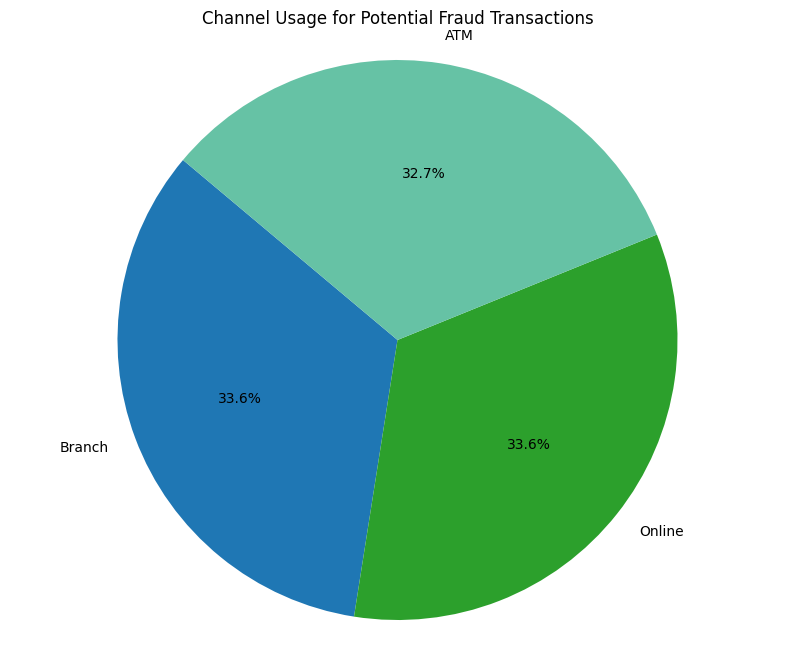

In [76]:
# Plotting a Pie Chart for Channel Usage Patterns for Fraud Transactions
plt.figure(figsize=(10, 8))
plt.pie(fraud_channel_usage['FraudTransactionCount'], labels=fraud_channel_usage['Channel'], autopct='%1.1f%%', startangle=140, colors=["#1f77b4", "#2ca02c", "#66c2a5"])
plt.title('Channel Usage for Potential Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

